In [3]:
import numpy as np
import pandas as pd
import seaborn; seaborn.set()  # plot styling
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
# https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95?
d = pd.read_csv('https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD',
                 parse_dates={'datetime': ['DATE', 'TIME']}, index_col='datetime')


In [4]:
d.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
datetime,,,,,,,,,,,,,,,,,,,,,
2015-08-15 11:20:00,MANHATTAN,10013,40.720557,-74.003510,"(40.7205573, -74.0035102)",CANAL STREET,CHURCH STREET,NaN,1,0,...,NaN,NaN,NaN,NaN,3277740,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
2015-08-15 04:20:00,QUEENS,11377,40.747497,-73.913062,"(40.7474972, -73.9130622)",NaN,NaN,39-35 51 STREET,0,0,...,Unspecified,Unspecified,NaN,NaN,3278227,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN
2015-08-15 04:19:00,BROOKLYN,11215,40.669314,-73.979564,"(40.6693135, -73.9795644)",7 AVENUE,5 STREET,NaN,0,0,...,Unspecified,NaN,NaN,NaN,3278065,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
2015-08-15 21:30:00,MANHATTAN,10032,40.843502,-73.937983,"(40.843502, -73.9379834)",SAINT NICHOLAS AVENUE,WEST 172 STREET,NaN,0,0,...,Unspecified,NaN,NaN,NaN,3278414,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2015-08-15 21:28:00,BROOKLYN,11218,40.641063,-73.972269,"(40.6410626, -73.9722693)",EAST 7 STREET,AVENUE C,NaN,1,0,...,NaN,NaN,NaN,NaN,3278520,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN


In [5]:
gbb = d.groupby('BOROUGH')

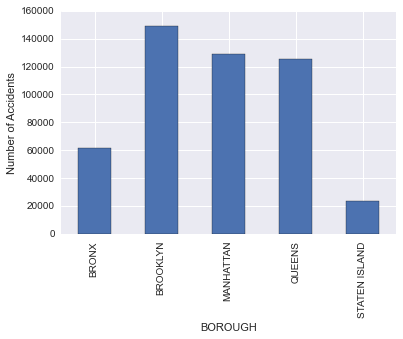

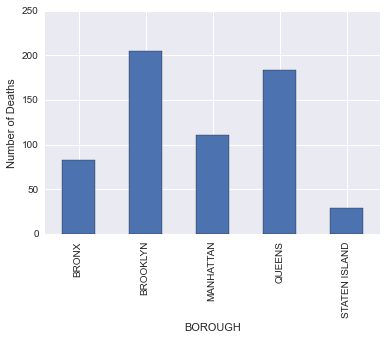

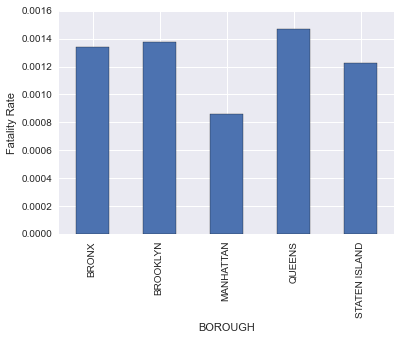

In [6]:
plt.figure()
gbb.size().plot(kind='bar')
#d['BOROUGH'].value_counts().plot(kind='bar')
plt.ylabel('Number of Accidents')

plt.figure()
gbb['NUMBER OF PERSONS KILLED'].sum().plot(kind='bar')
plt.ylabel('Number of Deaths')

plt.figure()
(gbb['NUMBER OF PERSONS KILLED'].sum()/gbb.size()).plot(kind='bar')
plt.ylabel('Fatality Rate')

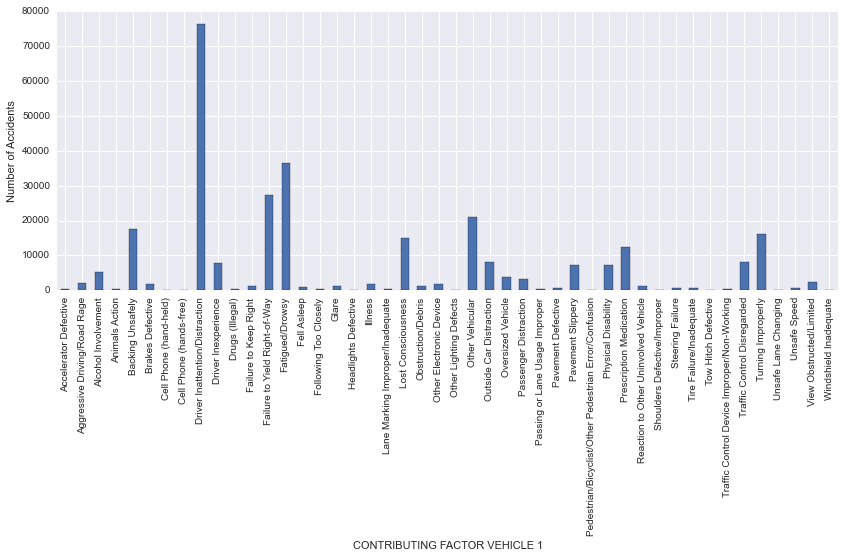

In [7]:
#exclude unspecified causes
plt.figure(figsize=(14,5))
gbfac = d[d['CONTRIBUTING FACTOR VEHICLE 1']!='Unspecified'
         ].groupby('CONTRIBUTING FACTOR VEHICLE 1')
gbfac.size().plot(kind='bar')
plt.ylabel('Number of Accidents')

In [8]:
dm = d[d['BOROUGH']=='MANHATTAN']
dm.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
datetime,,,,,,,,,,,,,,,,,,,,,
2015-08-15 11:20:00,MANHATTAN,10013,40.720557,-74.003510,"(40.7205573, -74.0035102)",CANAL STREET,CHURCH STREET,NaN,1,0,...,NaN,NaN,NaN,NaN,3277740,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
2015-08-15 21:30:00,MANHATTAN,10032,40.843502,-73.937983,"(40.843502, -73.9379834)",SAINT NICHOLAS AVENUE,WEST 172 STREET,NaN,0,0,...,Unspecified,NaN,NaN,NaN,3278414,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2015-08-15 21:17:00,MANHATTAN,10024,40.783900,-73.974059,"(40.7839004, -73.9740586)",COLUMBUS AVENUE,WEST 82 STREET,NaN,0,0,...,Unspecified,NaN,NaN,NaN,3278962,LIVERY VEHICLE,UNKNOWN,NaN,NaN,NaN
2015-08-15 19:00:00,MANHATTAN,10017,40.757285,-73.978115,"(40.7572855, -73.9781153)",5 AVENUE,WEST 48 STREET,NaN,0,0,...,Unspecified,NaN,NaN,NaN,3278387,LIVERY VEHICLE,LIVERY VEHICLE,NaN,NaN,NaN
2015-08-15 18:58:00,MANHATTAN,10019,40.762396,-73.978601,"(40.7623963, -73.9786009)",AVENUE OF AMERICAS,WEST 54 STREET,NaN,0,0,...,Unspecified,NaN,NaN,NaN,3278383,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN


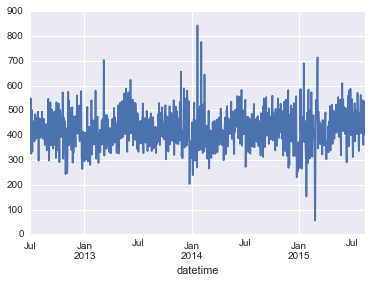

In [9]:
numdaily = d['ZIP CODE'].resample('D', how='count')
numdaily.plot()

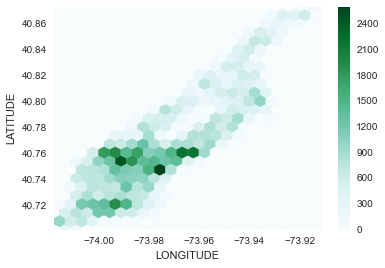

In [10]:
dm.plot(kind='hexbin', x='LONGITUDE', y='LATITUDE', sharex=False, gridsize=24)

In [11]:
meanyear = d['ZIP CODE'].groupby(d.index.month)
dslip = d[d['CONTRIBUTING FACTOR VEHICLE 1']=='Pavement Slippery']
meanslip = dslip['ZIP CODE'].groupby(dslip.index.month)

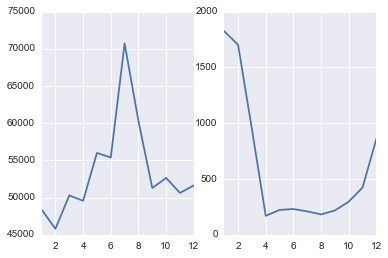

In [12]:
plt.subplot(121)
meanyear.size().plot()
plt.subplot(122)
meanslip.size().plot()

In [13]:
meanday = d['ZIP CODE'].groupby(d.index.hour)
mondays = d[d.index.dayofweek==0]
mean_monday = mondays.groupby(mondays.index.hour)
sundays = d[d.index.dayofweek==6]
mean_sunday = sundays.groupby(sundays.index.hour)

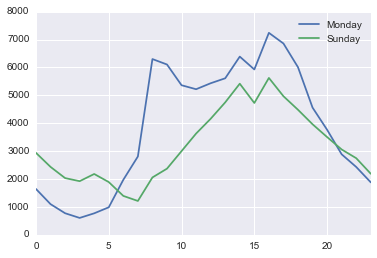

In [14]:
#meanday.size().plot()
mean_monday['ZIP CODE'].size().plot(label='Monday')
mean_sunday['ZIP CODE'].size().plot(label='Sunday')
plt.legend()


In [15]:
# only fatal accidents
df = d[d['NUMBER OF PERSONS KILLED']>0]

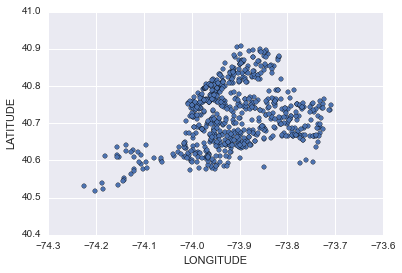

In [16]:
#df.plot(kind='hexbin', x='LONGITUDE', y='LATITUDE', sharex=False, gridsize=24)
df.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', sharex=False)

In [90]:
d['NUMBER OF PERSONS KILLED'].sum()

840